# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.) #(mean, sigma)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

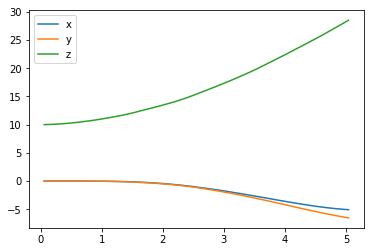

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

(-2.877341108657231, 6.68770214160231)

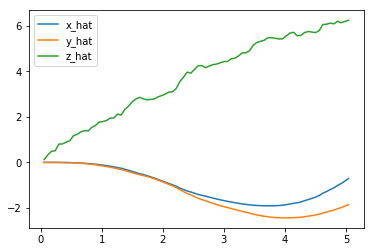

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

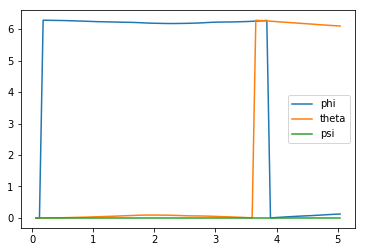

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

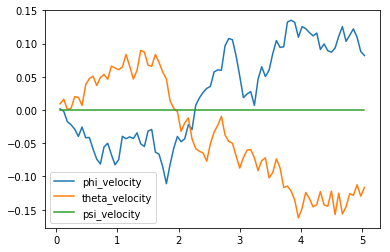

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

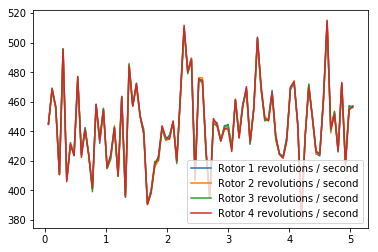

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-5.0779974  -6.53413637 28.50157268  0.12452502  6.09894213  0.        ]
[-0.71097575 -1.854644    6.25292745]
[ 0.08204773 -0.11662353  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [11]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -1.767 (best =   0.252), noise_scale = 3.2555

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [ ]:
The sample agent given in agents/policy_search.py uses 
a very simplistic linear policy to directly compute the
action vector as a dot product of the state vector and a
matrix of weights. Then, it randomly perturbs the parameters
by adding some Gaussian noise, to produce a different policy.
Based on the average reward obtained in each episode (score), 
it keeps track of the best set of parameters found so far,
how the score is changing, and accordingly tweaks a scaling
factor to widen or tighten the noise.



In [29]:
## TODO: Train your agent here.
import sys
import pandas as pd
from agents.agent import Agent

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

[ -377.61550678 -1176.26707929    29.80141679   106.07863855]
1
[ -444.24400153 -1152.43265803    93.69052008   175.14241797]
1
[ -394.37224211 -1147.30110273   203.71967508   182.62355661]
2
[ -360.19935529 -1124.97187384   334.23042023   220.17248756]
3
[ -390.92098349 -1119.66866352    38.19427085   186.48791898]
4
[ -410.60230362 -1067.44362322   104.45778426   266.53910659]
5
[ -435.18837752 -1099.26871682   157.17431938   240.93788703]
6
[ -353.21122379 -1068.35628187    48.06091374   209.54002904]
7
[ -363.90806746 -1008.5327768    104.5787361    289.1299895 ]
8
[-300.98039248 -998.82372707  428.75163584  328.31207082]
9
[-291.23715943 -995.12561349   41.67434181  250.55506269]
10
[-294.2813254  -928.51498789   92.78014416  330.49659418]
11
[-223.66319876 -914.19157278  413.25773985  376.72123734]
12
[-206.63515356 -897.11777604   22.09759088  292.11831343]
13
[-203.17449581 -823.12140962   71.88809306  375.70542267]
14
[-199.838305   -747.97350411  122.78843251  485.57388618]
1

[ -374.41820162 -1059.68514743     7.36179883   240.94769617]
8
[ -389.31241932 -1000.04232169    58.14414889   318.7576873 ]
9
[-330.64735465 -993.52225815  376.20618952  354.42663837]
10
[-331.24373566 -988.94592801  -19.74979748  282.7625918 ]
11
[-339.10386142 -921.09016141   27.74054003  361.91836652]
12
[-271.63665419 -913.14134434  342.82824592  406.25309714]
13
[-265.69381302 -899.95047284  -56.9511458   335.42044079]
14
[-268.0440703  -822.01110153  -14.43910005  417.8175567 ]
15
[-268.17802552 -744.47156056   30.75736359  528.93766847]
16
[-288.1391364  -603.55155854 -133.78723465   51.77116753]
17
[-220.91788333 -552.72105365   48.98475299  306.91980806]
18
[-147.87585506 -521.85251985  377.73651776  350.18416157]
19
[-125.13170029 -504.9331585   -28.19238366  294.16511724]
20
[-110.90469364 -419.00806562   -3.55956014  357.51035127]
21
[ -94.99340293 -329.47202009   23.28508941  429.12607636]
22
[ -78.18028194 -239.66694848   51.48436246  514.65631223]
23
[-177.5635325   -5

[  33.99492782 -142.49963511  -44.95976732  413.81187036]
23
Episode =   11, score =  -0.306 (best =  -0.306), noise_scale = 1.6[ -345.94404271 -1076.71916231   -69.9285808    150.65362295]
1
[ -388.9368937  -1025.22552838   173.18905155   272.42229213]
1
[ -404.95613937 -1004.61079073   209.8032839    307.83727205]
2
[-408.53695689 -939.06042246  -35.96854356  331.68879101]
3
[ -440.88731683 -1032.42376367    33.32445479   253.50117077]
4
[-378.36226259 -994.10406545  -78.32895345  279.07877129]
5
[-402.50329899 -934.19723423  -28.58834594  371.42585602]
6
[-348.41097642 -981.19389188  262.37415242  402.29094449]
7
[-349.03995018 -977.68308193 -121.19522673  317.54316803]
8
[-364.16186409 -910.23056104  -81.82916195  408.93291892]
9
[-379.64772847 -839.58065154  -41.70623751  527.82485027]
10
[-297.32241012 -945.45764111 -174.23983563  443.52127273]
11
[-311.03929692 -858.17135553 -143.73553168  563.34265881]
12
[-378.48000473 -678.71382755   22.57017018  378.71716161]
13
[-312.810434

[-300.62585442 -861.62189772  -35.40144628   66.35312521]
10
[-323.38311328 -795.47312052    8.38924848  132.87202947]
11
[-340.16895601 -722.71320456   46.50707091  201.58264411]
12
[-343.47722499 -717.22933789   64.29066409   87.18208081]
13
[-244.93403989 -682.5828146   -22.46528133  122.59566922]
14
[-252.44564859 -607.73415112   10.88797877  181.33064555]
15
[-259.88666852 -525.00675504   42.57484403  248.86264483]
16
[-191.52797268 -504.18783097  334.23869039  251.66214884]
17
[-139.68178756 -473.58384515  -36.98633765  169.66459683]
18
[-135.71441741 -390.90210201  -11.79322984  222.58689536]
19
[-130.85670081 -304.38812233   13.26992085  282.63277085]
20
[-124.49703478 -215.65919205   40.01258581  351.53481645]
21
[ -32.67415736 -196.28338774  320.95119518  355.92504929]
22
[  39.96622496 -158.99845752  -64.76697586  265.33053705]
23
Episode =   17, score =  -0.199 (best =  -0.199), noise_scale = 1.6[ -343.9071128  -1042.33011532   -23.33443147   -16.73111488]
1
[ -236.33607844

[-365.40161612 -421.36228573 -203.59054126    3.80474093]
20
[-385.95797677 -329.87189022 -172.82735344   71.81896705]
21
[-396.51531037 -238.21078759 -171.44671373  125.02823319]
22
[-411.80718713 -136.55641328 -164.09430703  181.85650106]
23
[-348.91820531  -95.81947363  101.43200622  175.65004899]
24
[-295.90310811  -77.87492235 -222.51208394   19.0145605 ]
25
[-290.74690583   13.09955439 -217.47135399   45.45953154]
26
Episode =   22, score =  -1.331 (best =  -0.199), noise_scale = 3.2[ -490.91287104 -1126.49908016    50.65308404    31.58103201]
1
[ -439.6434032  -1242.468182      46.5327885    547.26976863]
1
[ -500.36783912 -1148.41386702    36.29696488   182.89959063]
2
[ -492.00785246 -1129.43928692    31.3286219    304.46468663]
3
[ -504.03331371 -1142.57746276   106.21109209   202.923304  ]
4
[ -422.84840256 -1138.80154418    -5.01535424   298.50449115]
5
[ -441.63441059 -1109.93778155    44.7638859    373.0041229 ]
6
[ -426.64203709 -1121.03004672    80.77120143   283.915123

Episode =   27, score =  -0.621 (best =  -0.122), noise_scale = 3.2[-339.35303803 -916.75022015   83.41672198  -89.93940866]
1
[-468.48250027 -848.94301815  267.65737509  -34.10171341]
1
[-499.5413313  -873.76083918  148.72687463  -80.82469206]
2
[-440.17446523 -833.79535899  144.88901498  -18.23295368]
3
[-509.68887372 -863.92059859  177.84819798 -108.52639314]
4
[ -329.79830479 -1057.54214787   -10.95800154   252.61890698]
5
[ -468.31406329 -1007.02696354    44.45503117   259.6668442 ]
6
[-469.3690151  -768.35461591  178.55388314  -11.68215354]
7
[-396.25922987 -781.15073894   84.24246301  -33.48063089]
8
[-469.4800274  -721.60676841  176.15732123  -11.35843968]
9
[-356.47114809 -763.6254031    49.91539322  -74.67626643]
10
[-396.95562202 -710.5933316    95.01762522  -60.36860238]
11
[-425.34793681 -653.02165895  126.36088712  -42.32621913]
12
[-337.78992215 -857.11326377  176.96909999  424.43151107]
13
[-352.0188392  -622.01269651   35.6995153   -35.85974061]
14
[-404.25879784 -545.

Episode =   33, score =  -0.479 (best =  -0.111), noise_scale = 3.2[ -365.06976065 -1043.82339471  -104.612469    -121.35124564]
1
[ -413.23866264 -1003.88414272  -104.34324775  -119.76450329]
1
[-315.69343196 -981.5899542    76.84319572  -15.12837198]
2
[-312.93748529 -971.71026686  217.07726452  -13.27187986]
3
[-365.58446164 -961.06502963  -61.26622025  -41.26545454]
4
[-363.24805813 -903.63297512    8.56987778    3.85933102]
5
[-441.09354919 -997.69532946  272.52552312  227.09435136]
6
[ -239.17192536 -1211.78237838  -169.70227667   378.08109981]
7
[-328.19009414 -853.94912394  -95.79142785   46.44467842]
8
[-242.32415755 -887.92306793  212.64863787   46.27373462]
9
[-282.44941964 -865.99583293  -49.12746886   16.25542835]
10
[-266.41865214 -788.86958616   19.42107774   73.9454212 ]
11
[-180.58199611 -789.47256665  312.60451708   86.41430233]
12
[-208.59862608 -780.338568    -39.31885635   54.35077534]
13
[-186.06855406 -700.68867204   17.35072631  101.82351813]
14
[-164.31580429 -

[-399.10761266 -831.2366012     0.94592171  -83.48432024]
8
[-306.72500785 -852.44773705  236.62366268  -56.07079316]
9
[-335.85856575 -819.23727404  -73.29427589 -100.0964628 ]
10
[-350.97037633 -757.8464731   -33.08012686  -79.15476505]
11
[-366.44655187 -684.21813375   13.32941065  -52.98404267]
12
[-387.12612345 -715.70995021   19.95282238 -110.79989572]
13
[-293.49196694 -641.63410829  -50.73790602  -70.47517766]
14
[-297.55204835 -567.77037973  -12.40997286  -46.7339685 ]
15
[-302.2022587  -484.65988739   28.10847814  -19.86695451]
16
[-310.11656053 -508.81079906   27.67221821  -77.06788567]
17
[-205.2670832  -423.28268085  -48.83868466  -35.2939995 ]
18
[-199.98426965 -339.27364576  -16.16308835  -12.27192524]
19
[-193.88059672 -249.60328409   16.5063455    12.4757086 ]
20
[-187.48061252 -156.5711397    51.46472916   37.84714129]
21
[-179.41804354  -62.01750629   86.11243769   62.54327189]
22
[-61.72396513 -76.98732844 -46.92744288  20.65914598]
23
Episode =   39, score =  -0.28

[-177.29581595 -609.53526678  156.98445964  267.67836194]
16
[-179.28685211 -537.26897718  218.45458447  342.65008777]
17
[ -54.0301891  -589.20143461   22.64032895  243.27161946]
18
[ -49.00868762 -519.16930575   79.14338262  311.54976298]
19
[ -37.83652334 -448.03128245  127.31702994  385.54342255]
20
[ -24.33659517 -377.4893539   180.26060105  474.03448075]
21
[  -5.80606663 -312.22430713  234.9780381   583.66276599]
22
[ -40.06904434 -134.37966444  -92.56745719   36.503642  ]
23
[  42.81635894 -117.6784144    88.95645932  251.51263068]
24
Episode =   44, score =  -0.798 (best =  -0.111), noise_scale = 3.2[ -398.07161534 -1056.99054062    40.41018101  -139.2566266 ]
1
[ -468.01857137 -1020.97967149    55.38017975  -129.36607524]
1
[ -386.95426229 -1033.01683754   196.37925535   -69.33254971]
2
[ -458.52905387 -1018.52069533   101.16609711  -126.31296525]
3
[-453.02359276 -988.09114428   94.44497339  -62.4077744 ]
4
[-476.21042077 -944.0025631   153.78404524  -25.68142409]
5
[-434.33

Episode =   49, score =  -0.325 (best =  -0.111), noise_scale = 3.2[ -454.12730739 -1079.56591642    16.57164209   -92.42644122]
1
[ -560.21979364 -1063.64509478    26.56087491   -67.16389529]
1
[ -431.28612833 -1029.02271678   178.90000412   -26.36439219]
2
[-4.51959166e+02 -1.02770976e+03  3.11725151e+02 -2.36829234e-01]
3
[ -506.00574723 -1021.76778976    47.28469737   -15.30415416]
4
[-544.27487423 -979.04714145  113.35592965   25.56529403]
5
[-440.91762264 -988.63501061  391.81076692   29.91990512]
6
[-450.77460003 -987.64734501   36.21964601    1.2422652 ]
7
[-481.26552683 -935.24159494   85.54479069   31.71334447]
8
[-519.68919035 -864.28783018  143.92202565   66.540296  ]
9
[-405.34033783 -883.92501884   23.41249293  -24.11957165]
10
[-296.38214156 -995.70778017   42.25160507  405.38416996]
11
[-344.39316362 -795.97999764  379.89632159   87.70844295]
12
[-366.45711477 -754.49679592   65.28445348   90.9102125 ]
13
[-404.19984309 -664.57309133  143.59959755  141.03265319]
14
[-28

Episode =   54, score =  -0.583 (best =  -0.111), noise_scale = 3.2[ -411.32450403 -1081.41481952   111.54820107   -23.06053423]
1
[-532.75869124 -987.63048138  161.59682335  -12.034365  ]
1
[-483.78827425 -955.39159624  121.66095958   38.34951559]
2
[ -291.47089486 -1250.58418041    43.81315832   311.22223972]
3
[ -488.13953911 -1008.9838163     19.57410422     5.15339917]
4
[-491.77848721 -999.84442811  247.09696828  -26.98709595]
5
[-435.30500369 -953.28906922  178.90416591   46.5106997 ]
6
[-452.62125155 -876.92698941  248.18016907   74.30304979]
7
[-369.00804565 -972.31060108  107.2596241    37.69164382]
8
[-392.89468928 -881.89646376  181.75079716   60.8219935 ]
9
[-410.06512066 -787.83021051  252.23522693   84.25233641]
10
[-326.53541067 -863.46754338  112.95903206   45.28501499]
11
[-341.60861933 -767.70556078  183.09307611   59.13735037]
12
[-453.74306142 -694.46555689  251.38433798  284.18623555]
13
[-114.12767307 -959.55284971   26.98647394  343.88086551]
14
[-360.0660746  -

[-250.04103423 -965.40634798   71.74331236  369.25061906]
8
[-252.31230754 -912.83361127  134.9436836   449.50688782]
9
[ -158.52155102 -1023.46958908    38.16421143   438.45784246]
10
[-349.40746226 -686.23186115  -11.56118221   64.61510449]
11
[-146.42516516 -746.21062562  256.36806765  224.11108342]
12
[-167.84300181 -748.68531365   54.9981066   219.76116657]
13
[-153.09886603 -685.92899507   94.50551126  283.84809118]
14
[-140.10883676 -613.41798317  135.12146495  349.5715537 ]
15
[-125.09461067 -708.04612317  181.87275427  285.46828011]
16
[ -19.67545518 -623.68721593   72.24756375  374.67547064]
17
[   3.27079588 -551.04075951  109.81912021  446.29589752]
18
[  31.64278109 -480.74875519  150.79616905  536.92222345]
19
[ -21.3957602  -247.70794059  300.61956851  164.69344782]
20
[  77.70411092 -268.34538851   89.72503733  308.9437855 ]
21
[ 106.12160629 -189.96003479  144.00293563  384.71209968]
22
Episode =   60, score =  -0.820 (best =  -0.111), noise_scale = 3.2[ -436.50763504 

[-258.94584714 -552.30916577   77.77777616   86.72267558]
16
[-174.74716281 -494.83398571  -30.43710656  127.54069008]
17
[-170.86281853 -403.54128053   11.42440814  157.16276365]
18
[-167.23994672 -304.48666236   55.81472672  192.21792088]
19
[-164.88327592 -199.51442559  105.44207574  231.07231489]
20
[-144.48631881 -264.25290785  112.6009368   147.59539351]
21
[ -46.36477529 -208.14030009  -10.85840913  189.33648397]
22
[ -30.60456054 -118.12055785   20.75355369  219.46465177]
23
[-12.66059762 -27.38859893  50.54070311 252.49217808]
24
Episode =   65, score =  -0.470 (best =  -0.111), noise_scale = 3.2[ -402.9539786  -1019.17448347    -7.51986686    -4.89467621]
1
[ -270.33635889 -1222.31737655   137.33164843   541.79132193]
1
[ -369.66261725 -1054.48647304   200.40076164   208.73689216]
2
[ -407.20776008 -1028.68400347    39.16514228   211.67947173]
3
[-432.8033928  -986.11999703  112.90186246  270.20812866]
4
[ -427.61606899 -1057.35513109   120.33357313   204.93720783]
5
[-380.81

Episode =   70, score =  -0.671 (best =  -0.111), noise_scale = 3.2[-326.77946209 -966.04288884   85.92128493 -108.73752448]
1
[-341.97994005 -949.85691029  105.03849789  -85.96074227]
1
[-268.30129296 -951.68239322  217.19855374  -50.30651871]
2
[-283.44840517 -965.10203759  352.72071032  -42.07647876]
3
[-350.816612   -934.00816409  121.37698075  -22.48895251]
4
[-369.06338259 -910.95594447  183.41406994   -2.82495491]
5
[-385.81157283 -957.60719303  207.62615206  -93.93223728]
6
[-314.33397008 -896.26416488  115.45560354  -43.9151976 ]
7
[ -215.11550617 -1072.71504309   135.48843014   327.53037467]
8
[ -163.54653982 -1058.03795039    49.17417088   324.91574215]
9
[-299.84590692 -810.76348312  163.60446157   22.28261288]
10
[-262.11820651 -772.95229875  103.27980996   32.01047076]
11
[-293.39334945 -797.27321799  200.1776798   -40.68837895]
12
[-211.92152689 -715.63222419  122.26380334   20.29721507]
13
[-215.8255179  -654.66886948  162.25857253   48.39428798]
14
[-332.10752975 -622.

[-412.40974845 -375.3080825    20.40867343  -48.52484572]
19
[-420.41515762 -291.09064934   43.06252457  -20.66979194]
20
[-291.32734524 -300.42022944  -68.87825825 -116.6347643 ]
21
[-284.52668289 -225.95102249  -42.37172838  -99.85303978]
22
[-269.03218507 -144.73480771  -37.7220149   -86.69042816]
23
[-251.63357637  -59.74501212  -32.15348352  -72.5923018 ]
24
[-232.41313989   26.25167582  -27.45327002  -60.21516187]
25
Episode =   76, score =  -0.734 (best =   0.044), noise_scale = 3.2[ -433.57135211 -1014.74746692    72.28788812   -97.57472914]
1
[-466.02007944 -959.93727786   93.99844031  -64.61960341]
1
[-566.00889408 -931.52680163  123.75753809  -79.50552762]
2
[ -515.03592206 -1027.90819521   181.34792286  -110.00084221]
3
[-498.43793922 -881.87262179  126.73475831  -13.53331516]
4
[ -473.37172447 -1228.70622632   101.98639259   256.13590187]
5
[-358.68013037 -957.80097758  260.0025985    33.18141882]
6
[-425.88558574 -920.28382107   99.95273816  -13.39555791]
7
[-456.8782933 

[-168.41565978 -485.29855939  357.56617941   68.28114194]
18
[-176.80435786 -357.6035702    20.71886684  -13.5253801 ]
19
[-310.84156739 -303.0805851    48.54816621  271.63518071]
20
[ -87.70068518 -418.6688562    55.73717029  429.86666754]
21
[-140.24287721 -127.60691742  145.73302261  110.63236828]
22
[ -17.63284881 -161.5793364   358.68502531  163.76263707]
23
[-12.88741778 -22.2384449   -0.36671042  85.93986984]
24
Episode =   81, score =  -0.567 (best =   0.044), noise_scale = 3.2[-435.898622   -959.52855391  161.21158856  -65.99143345]
1
[-530.55688108 -896.79717058  358.7744256    40.83958587]
1
[-548.78848882 -949.17631174  247.61223295  -16.99346903]
2
[-472.25286245 -941.19275486  466.89462787   81.76939752]
3
[-515.71548539 -910.15907832  186.02240697   76.87123788]
4
[-547.5750915  -869.12384369  248.28121926   95.82980389]
5
[-527.18211441 -970.57265602  252.57289239  -41.79559376]
6
[-490.08202911 -861.74921828  145.45924421  -19.11923561]
7
[-521.5889016  -798.66556027  

[-120.46847482 -292.69886527   97.34367463   84.58131759]
20
[-101.48293133 -214.96143039  124.31038692  110.40056949]
21
[ -74.01875132 -251.71442176  138.14358452   48.79122508]
22
[   4.80393537 -111.55000276   39.84080068   81.31678059]
23
[ 31.60401825 -23.44526958  55.52873632 102.68344618]
24
Episode =   86, score =  -0.419 (best =   0.044), noise_scale = 3.2[ -451.23194781 -1023.8259477    166.85345232  -109.73924105]
1
[-490.14112701 -976.26332273  183.44086459  -63.16874941]
1
[-526.70487565 -905.11546587   92.3433852   -24.45337424]
2
[ -431.50422059 -1213.3932446    132.69450982   280.70826319]
3
[-613.54950426 -848.37157258   14.89147332 -153.3134507 ]
4
[-401.31394496 -980.39429796  427.41357482   33.43150049]
5
[-460.13001593 -946.70383597  211.35506621   61.2975441 ]
6
[-464.9192282  -900.59700743  259.03856249  103.47945768]
7
[-428.16649365 -974.70554415  287.7215289     5.31381691]
8
[-375.75464635 -882.44214504  194.74570845   64.96039819]
9
[-384.10582285 -814.3830

Episode =   91, score =  -0.258 (best =   0.044), noise_scale = 3.2[-350.0888541  -943.29373933  206.01319435 -193.95514629]
1
[-605.79971842 -904.82907097  340.85540349  183.70918103]
1
[-374.81918589 -888.48757762  167.97766436 -160.4905971 ]
2
[-447.37219354 -944.98675264  271.46171061 -187.02428216]
3
[-417.45347284 -838.25943759  243.41596222 -115.27761905]
4
[-442.88073742 -971.9149352   331.46524027 -194.94677984]
5
[-554.02251307 -907.42666026  174.17023436  117.17579136]
6
[ -369.9872737  -1053.28059785   217.01335368   255.58596733]
7
[ -327.88229928 -1043.70034974   123.05248169   211.23730244]
8
[-369.23191802 -983.99552113  216.1798088   258.9519165 ]
9
[ -299.63008968 -1028.81047898   122.07960643   181.06813323]
10
[-324.10611651 -962.8827727   157.55670363  211.84654391]
11
[-343.43052918 -894.05511     197.92946012  250.22186367]
12
[-272.00303468 -920.55213512   98.11947285  184.35096358]
13
[-289.6632497  -854.46029372  138.12152902  219.05016523]
14
[-301.53726889 -

Episode =   96, score =  -0.268 (best =   0.101), noise_scale = 3.2[-366.78200618 -970.14298455   95.30689548 -167.43701738]
1
[-371.41827088 -961.37014779  108.37855857 -152.33479459]
1
[ -384.48869404 -1046.68806371   324.50083676  -113.6287022 ]
2
[-430.84126484 -973.05277973   97.64778139 -136.2483502 ]
3
[-407.60677309 -914.76094973  124.87116256  -77.81106619]
4
[ -343.91779319 -1034.88969803   411.77921382   -48.24353306]
5
[-380.8906392  -924.76720153   75.79244357  -59.1433489 ]
6
[-397.71637864 -896.58159874  116.24716309  -37.98872891]
7
[ -406.86137945 -1003.00001446   183.10234757  -125.77065952]
8
[-370.36923206 -865.9817238    77.37734358  -94.76751805]
9
[-389.50378118 -811.14229629  108.05944174  -68.64449995]
10
[-395.32834066 -904.50990455  177.23808989 -148.76766497]
11
[ -228.51532454 -1056.72095974   129.64991068   411.46173235]
12
[-374.01716213 -822.1874151   129.78210281 -101.98678487]
13
[-341.76342088 -672.86978455   79.51339351  -20.38936081]
14
[-297.671536

Episode =  101, score =  -0.382 (best =   0.101), noise_scale = 3.2[-403.92767151 -999.94581517  191.38711748 -266.57459581]
1
[-426.34100292 -942.73875325  225.38841917 -240.62357796]
1
[-522.31776037 -901.52453132  288.24213431 -233.29260402]
2
[ -487.67346026 -1012.71465409   343.71413405  -244.0740642 ]
3
[-448.69316572 -859.2207385   272.81208769 -180.14273074]
4
[ -464.81038898 -1017.60552456   345.21481141  -223.71663139]
5
[-405.93285744 -896.78262876  242.71413247 -178.47772813]
6
[-425.27909739 -841.22425676  328.89322001 -148.57713732]
7
[-431.07159217 -973.86764663  345.7841524  -192.65928136]
8
[-362.75519959 -857.95523531  240.63313327 -159.7590505 ]
9
[ -276.04964262 -1024.85371697   344.02678631   391.11666337]
10
[ -251.22642857 -1004.15090384   110.38506524   221.39476964]
11
[-275.29127082 -921.38820864  218.10424458  259.40699525]
12
[-205.66203023 -965.5658021   520.7022288   319.58612648]
13
[-196.25259502 -910.57871832  133.42329478  293.69891844]
14
[-197.916009

[-166.5194198  -128.90015815   68.17588712   23.1337746 ]
23
[-159.389932    -49.22870997   79.12604865   39.96770497]
24
[-149.66649923   30.83099206   87.47475662   55.72014831]
25
Episode =  106, score =  -0.585 (best =   0.101), noise_scale = 3.2[-300.99909601 -956.2552662   176.11047924 -195.90057328]
1
[-313.86137822 -916.92549482  184.35222635 -170.4653827 ]
1
[-426.92596406 -852.99420475  193.03426449 -151.99365416]
2
[-302.74535645 -911.41701341  160.49399072 -169.22596425]
3
[-343.28592511 -828.86798421  198.81243695 -109.54973326]
4
[-316.75570916 -939.66705638  494.67461635  -46.33598881]
5
[-305.24420099 -915.076009    185.53457314  -18.91924679]
6
[-317.65640358 -876.4680394   227.40511585    3.00340992]
7
[-336.08050115 -815.10106889  257.83198046   29.43571047]
8
[-253.63870081 -882.84555396  178.65414377  -49.39971514]
9
[-273.08618638 -815.20648038  210.33591236  -28.84892261]
10
[-288.02999113 -740.85669856  240.4351731    -4.87617747]
11
[-320.529656   -849.93919612

Episode =  111, score =  -0.319 (best =   0.101), noise_scale = 3.2[-310.1804769  -964.23141834  188.47657803 -203.05712408]
1
[-323.6219246  -923.58533181  199.63205165 -165.67449476]
1
[-257.39994306 -942.31739286  316.26451718 -118.665725  ]
2
[-259.32696787 -968.91934502  437.1367585   -51.27634056]
3
[-332.27594583 -921.73851563  187.73665003  -63.65355562]
4
[-335.82346416 -893.94954444  255.70916559  -17.86377871]
5
[ -336.97436759 -1011.98051911   322.11747235   -87.75587288]
6
[-298.1215193  -875.5484052   191.15294537  -81.79734463]
7
[-304.97772319 -811.54777623  248.17176613  -36.49156231]
8
[-511.59561204 -934.10986684  288.61126225  162.99826427]
9
[ -298.92858958 -1032.63370347   149.3384172    243.83824824]
10
[ -221.92791448 -1051.04052595   441.26995945   358.85383864]
11
[-263.59586956 -934.89147506  139.52168773  252.34307885]
12
[-263.30786597 -858.61615684  205.13150627  325.10038264]
13
[-204.18425097 -872.03250978  116.86843749  248.33213204]
14
[-197.28464935 -

[ -66.01949915 -296.33555968  299.35797902  358.22243067]
25
[ -59.86457128 -190.81172687  -90.84705886  254.92385083]
26
Episode =  116, score =  -0.560 (best =   0.101), noise_scale = 3.2[-434.15372307 -980.55167652  166.39666825 -188.66349252]
1
[-506.53672405 -879.13485238  350.93757958 -110.46296422]
1
[-463.72704055 -902.75749146  141.10567758 -142.49782635]
2
[-542.21077159 -992.16753108  278.57284926 -168.77346055]
3
[-487.32308123 -874.34522855  219.24496374 -123.00684236]
4
[ -534.59018289 -1008.23573491   302.09566912  -180.94324253]
5
[-456.91731995 -901.67406953  172.55927269 -161.61179766]
6
[ -395.90124583 -1177.54473476   253.95987868   405.17527562]
7
[-464.56047487 -851.06531512  271.84484049 -206.89301015]
8
[-390.4196046  -876.41012222  435.31493501  -62.99682526]
9
[-423.42182685 -853.89474762  153.22777443  -96.4258459 ]
10
[-426.28969884 -787.07830096  189.82202681  -86.56267478]
11
[-434.09621395 -698.74743243  235.35026833  -72.03691064]
12
[-367.60389618 -722.

Episode =  121, score =  -0.391 (best =   0.101), noise_scale = 3.2[-421.63742934 -931.27980016  262.6377034  -183.01343361]
1
[-446.39105389 -949.65911011  399.78528996 -113.35066502]
1
[-528.42780037 -908.68821223  251.8101696   -98.49685203]
2
[-436.55071872 -911.05263224  231.27308058 -123.14059787]
3
[-457.58069034 -876.9210947   263.27107728  -80.2045565 ]
4
[-375.20388644 -954.64188189  535.76237729  -38.54441888]
5
[-427.61045319 -920.88743379  235.77937306  -23.19517004]
6
[-425.98730428 -896.00660922  257.18696625  -22.09355143]
7
[-438.47516757 -842.33619127  270.77053167  -14.21299638]
8
[-393.59168019 -829.58435589  206.11312803 -120.70652372]
9
[-404.74502727 -778.33214499  222.20226371 -112.77962546]
10
[-367.41805067 -997.08202036  225.14758008  232.4239731 ]
11
[-331.60499368 -948.40706031  148.34123785  172.2004337 ]
12
[-342.94533467 -896.49578463  197.33497033  204.11329656]
13
[-251.1662748  -932.33053017  446.42242764  242.33636797]
14
[-290.47255438 -809.94350227

Episode =  126, score =  -0.458 (best =   0.101), noise_scale = 3.2[ -434.14105126 -1021.74850011   228.64431419  -179.83319039]
1
[-451.95456793 -952.6068124   243.29398362 -144.31202354]
1
[-453.26290059 -882.54068728  161.71861967 -127.01848178]
2
[ -295.02610498 -1286.33631873   285.17031834   369.21876248]
3
[-497.09768557 -850.73179623  264.33339034 -221.3599135 ]
4
[-363.34941687 -953.19119324  482.02117796  -48.36705428]
5
[-402.81861141 -966.64275816  257.63013248  -13.61626001]
6
[-395.67317827 -916.99141494  291.55334555    9.28850428]
7
[-318.15379898 -974.94223246  561.13707925   59.1002615 ]
8
[-321.98685004 -973.28631098  229.6538741   111.36007985]
9
[-315.03210133 -903.5534605   264.16375926  112.29139331]
10
[-319.63871767 -811.16916441  308.66605665  124.13540498]
11
[-255.70040997 -833.61178869  215.92010403   59.53912741]
12
[-259.3159157  -744.54379885  265.13172179   68.34867994]
13
[-258.70411834 -638.8623752   302.79144397   82.36973363]
14
[-188.63339639 -651.

22
[-301.76779449 -292.66949355  144.86147553  326.21491614]
23
[ -83.46320284 -160.62027253  203.70563759   85.61618834]
24
[-2.09842710e-01 -4.39298755e+02  6.64125834e+01  4.79162749e+02]
25
Episode =  132, score =  -0.902 (best =   0.101), noise_scale = 3.2[-420.89793838 -958.2673473   153.15171835 -312.5553202 ]
1
[-472.53175647 -904.46535268  339.19599561 -233.04957689]
1
[-446.86684304 -856.35520643  101.42379713 -268.74907229]
2
[-520.04580864 -972.00079291  253.06518412 -296.12046878]
3
[-465.38229198 -867.51997831  182.54256559 -241.47099102]
4
[-487.57496058 -839.97832596  253.14728029 -212.02306991]
5
[-435.90913359 -914.67059585  116.35142469 -265.47356811]
6
[-453.12118461 -874.49151026  148.83196927 -233.54707034]
7
[-463.46478956 -837.30662592  188.54889304 -199.9305474 ]
8
[-473.98730944 -789.26347888  218.85709257 -169.32176844]
9
[-419.37731887 -847.03977767   84.14872364 -212.33552927]
10
[-428.12551268 -800.89914112  116.22527562 -179.69454189]
11
[-431.29468254 -7

Episode =  137, score =  -0.226 (best =   0.101), noise_scale = 3.2[-349.23273333 -881.3697523   361.90814753 -265.14217657]
1
[-364.81128353 -914.67830083  525.41848343 -168.53105108]
1
[-444.50457595 -862.83150929  339.64576981  -99.44585281]
2
[-414.08760485 -972.28508715  437.74602608 -123.53839738]
3
[-296.87474853 -956.15682566  612.52851312   14.28737075]
4
[-348.71210649 -938.92652282  342.26705322   42.49321444]
5
[-349.91720181 -896.71933776  371.66588226   59.60866686]
6
[-362.72752967 -831.63206503  397.34624765   79.96445227]
7
[-310.47664521 -857.23574357  307.11497897  -74.39345874]
8
[-319.98620755 -788.64534332  332.07016535  -52.66779863]
9
[-327.83252182 -708.00796562  350.99085478  -27.64678311]
10
[-335.78048279 -802.12090521  375.81484505 -151.72662894]
11
[-164.35958943 -941.04848758  376.87468961  325.45588882]
12
[-167.12367908 -901.67316649  528.43862295  295.11655191]
13
[-201.9762782  -788.15526621  229.77345924  152.17282907]
14
[-204.98284168 -697.46394245

Episode =  142, score =  -0.774 (best =   0.101), noise_scale = 3.2[-309.80558355 -979.49845043  162.37455853 -195.92640403]
1
[-337.23440781 -904.54537409  185.05319414 -136.4861648 ]
1
[-348.12273949 -829.7945231    99.37999974 -111.75035158]
2
[-321.77763794 -915.70420126  165.59094182 -151.37807998]
3
[-351.79527153 -842.31716444  247.19979719  -79.76950468]
4
[-366.50723232 -960.29466555  331.70945866 -162.82606852]
5
[-308.08938703 -866.44903852  191.42301119  -99.62720601]
6
[-317.50881465 -816.17807738  259.30858122  -57.48047829]
7
[-250.41063092 -906.11893515  560.53196294   -3.91555123]
8
[-266.51168068 -874.80601333  162.63329374   56.02087103]
9
[-252.75496854 -821.55475361  197.32180454   69.82805996]
10
[-260.75787708 -746.90491553  255.32564367   96.71617151]
11
[-194.64997523 -778.14694048  122.58661461   -2.66341609]
12
[-201.90538387 -706.77720767  183.76634879   21.1570267 ]
13
[-205.23679874 -624.2895315   235.82593438   49.85004925]
14
[-133.84682189 -682.92812041

[-422.33389877 -947.10946821  271.68101574  -75.95768478]
4
[ -355.64766631 -1045.33480436   560.14994412    -7.31638379]
5
[ -388.6477395  -1016.21577326   184.96942124    53.36457729]
6
[-411.80034273 -990.192503    224.54324494   65.02373904]
7
[ -346.32570467 -1074.5268614    518.25570798   108.76245604]
8
[-371.9083656  -986.99385881  154.97277842   55.49807974]
9
[-407.01502311 -933.73683923  200.53163432   71.29033476]
10
[ -423.50008526 -1013.0862629    278.38956269   -16.18446433]
11
[-353.6187257  -877.12074088  151.92653328  -25.59843005]
12
[-389.14228765 -800.10682886  190.19289424   -4.64090119]
13
[-300.40036543 -795.16278517  101.16901003  -99.32965797]
14
[-327.99501347 -732.53292531  149.11131319  -80.13520409]
15
[-350.25624684 -653.24408428  176.65963014  -60.84771413]
16
[-351.31724197 -715.10318799  243.08323602 -139.97199047]
17
[-263.87197821 -573.27772309  110.00964282 -144.11285334]
18
[-261.85726619 -710.49523633   57.19529463  289.50101973]
19
[-273.71307679

Episode =  153, score =  -0.363 (best =   0.101), noise_scale = 3.2[-310.11226188 -928.75072619  217.2537839  -209.1728818 ]
1
[ -256.00214388 -1215.67719279   466.27267742   413.26025412]
1
[-330.71264156 -908.31980344  446.82367485  -77.17897675]
2
[-367.41494997 -902.04086467  316.47215952  -50.34613285]
3
[ -456.33499211 -1003.44916986   326.14282757  -164.30122434]
4
[-342.39394117 -916.57476899  198.0428292  -143.22502548]
5
[-373.24068894 -880.69419268  248.52508747 -135.42345925]
6
[-403.42144145 -834.00711536  296.55359507 -124.71433039]
7
[-359.01362924 -847.40065459  156.15821726 -241.57316347]
8
[ -296.15127727 -1056.89768058   110.21346297   186.17241712]
9
[ -402.80193429 -1070.01766193   164.45235838   128.17837337]
10
[-309.76124994 -971.03528626  117.5725967   174.08514411]
11
[ -285.05300768 -1046.14219032   398.55070968   205.20242564]
12
[-280.84213717 -916.32121287   30.12746836  114.88182225]
13
[-305.46771335 -842.3650571    90.81658396  152.59744614]
14
[-402.40

Episode =  158, score =  -0.136 (best =   0.101), noise_scale = 3.2[ -411.54371526 -1027.90044398   170.77735645  -189.42517807]
1
[-463.68234221 -902.11321413  200.996026   -132.40860924]
1
[-452.63951124 -897.21247543  148.88508641 -148.07345484]
2
[ -494.67114614 -1001.19861339   271.16046761  -176.46918691]
3
[-470.06573621 -868.67657649  225.76260911 -114.05973744]
4
[-423.51550669 -993.36164667  531.14860889  -30.0518059 ]
5
[-434.96649697 -955.15969352  179.81486586   -5.24454371]
6
[-443.07644495 -900.16318547  231.5532693     8.77173542]
7
[-392.39355784 -995.32057094  499.11651013   68.85400582]
8
[-397.09264798 -921.18230843  148.23452073    9.84047964]
9
[-411.92562791 -844.68636366  198.3167853    18.50922495]
10
[-362.44956432 -918.37235545  473.83586619   78.50528813]
11
[-357.5786552  -832.37978301  126.96797295  -23.45081192]
12
[-370.22265228 -745.1076985   171.0758394   -10.87406481]
13
[-390.97423413 -635.47385031  225.16689938   10.01054054]
14
[-315.35945388 -661.

[-436.57910887 -791.0589959   318.43915664 -231.09182474]
7
[-464.90810079 -936.14393864  367.1224658  -314.28445028]
8
[-391.97180286 -822.52018642  233.41557559 -280.036171  ]
9
[ -331.93833978 -1047.33099238   321.73049833   227.86733686]
10
[-312.83454366 -974.6755005    79.6698048    55.59531623]
11
[-351.13092167 -883.79016606  200.45349839   91.80045791]
12
[-373.69021502 -997.99413809  254.23338927   17.50141827]
13
[-293.79676801 -859.38205078  124.19044537   64.90890201]
14
[-309.46810675 -743.16468631  175.87155439   98.06574988]
15
[-334.92116597 -825.26342072  240.02761396   34.44565564]
16
[-246.42619095 -690.58943464  120.77775237   81.55692758]
17
[-249.8905897  -569.48671177  157.69693109  115.81279926]
18
[-262.18526674 -656.43701988  210.89165723   50.99671178]
19
[-161.43792593 -517.81114922   80.3003513    98.44113842]
20
[-153.65355476 -398.04348293  105.61269724  133.25763218]
21
[-148.82107046 -267.18265108  139.00921303  175.02386318]
22
[ -44.16110756 -328.816

[-135.32504628 -892.73842041  393.70608905  307.92888444]
15
[-180.09478678 -775.62584748  127.94317595  205.93023982]
16
[-180.24075446 -666.08711782  164.43285493  237.8663594 ]
17
[ -96.06706704 -680.90975526  450.47469707  309.76688002]
18
[-116.90623719 -563.76578637  107.15188038  213.11509429]
19
[-105.26257534 -445.06931226  131.4129829   248.02956677]
20
[ -92.3605824  -323.04766069  165.10898866  291.42244128]
21
[ -26.32201991 -322.53385515   57.43662821  249.06716262]
22
[  -4.22905557 -217.97294651   86.87740443  289.86966156]
23
[  22.30359215 -111.52973616   95.79230196  335.56572289]
24
Episode =  169, score =  -0.647 (best =   0.101), noise_scale = 3.2[-357.89485132 -966.9788858   174.00093999 -313.15387254]
1
[-364.94260164 -949.94095151  187.21360038 -283.82687318]
1
[-465.45669645 -847.24523658  156.79598872 -230.66916104]
2
[-361.86260935 -943.85080843  155.71925842 -266.3511835 ]
3
[-403.83703045 -847.24223668  177.92504751 -175.67521461]
4
[ -412.22671984 -1014.9

[-199.42543548 -505.44708247  213.70856157  112.72976123]
22
[-113.17791024 -348.33998602   38.75563189  173.12513603]
23
[-123.31314049 -244.34492843   41.98635484  186.80988262]
24
[-133.46078955 -140.33323855   52.50808751  203.64493498]
25
Episode =  174, score =  -0.125 (best =   0.154), noise_scale = 3.2[-228.19346382 -993.77177874  268.92902154 -137.0666469 ]
1
[-224.35918395 -979.88978139  535.53062579   -2.86590262]
1
[-227.37196108 -995.04225479  385.61287981  116.05593219]
2
[ -330.31083402 -1105.03818672   366.41372083    19.07064655]
3
[ -304.5294971  -1126.80264164   371.50369998     3.63326219]
4
[-280.01611999 -987.00434303  297.64618137   39.29880152]
5
[ -294.17803245 -1095.72974822   402.64178756   -25.94772398]
6
[-250.66970493 -944.85875415  276.78097097   -9.60205497]
7
[-187.97061729 -996.12889385  626.09265132   78.36442229]
8
[-201.43628036 -972.03430795  248.05251802   56.60853741]
9
[-219.6387762  -912.71606139  287.66250645   62.35678637]
10
[-257.10973754 -

Episode =  179, score =  -0.547 (best =   0.154), noise_scale = 3.2[-307.37896958 -882.16378635  214.24709303  -55.55597065]
1
[-332.72261973 -895.4538689   434.28202693  -13.66341678]
1
[-415.34660428 -867.93122929  274.68594356   -1.01384371]
2
[-318.9250019  -855.85660984  184.54178248   18.59288051]
3
[-350.47576853 -819.59298778  284.78532778   35.8748544 ]
4
[-258.70367925 -892.55980846  591.62110214   84.24776203]
5
[-306.97476721 -879.32689586  182.12248741  144.02813276]
6
[-290.3298097  -854.50051478  229.67481032  128.7992298 ]
7
[-311.10440561 -810.70651838  284.00906374  123.72950971]
8
[-306.08756643 -907.52206969  323.68428065   -4.62168087]
9
[-280.2151223  -773.53258063  192.12370964   39.93291327]
10
[-302.91193155 -714.87288116  256.26958971   40.92409474]
11
[-295.57810296 -798.15236188  308.64338736  -80.18412599]
12
[-152.51795058 -929.76929919  220.72751064  477.82835981]
13
[-293.00594857 -614.12755486  231.38499526   80.9748663 ]
14
[-238.23758049 -586.61556324

17
[-152.10176651 -736.33671     187.67189622  141.29057114]
18
[ -97.09331771 -620.67649171   73.06321967  180.16395625]
19
[-116.72762644 -553.55345355   87.66853128  222.44353078]
20
[-133.93047547 -489.01905006  109.84862823  270.52160027]
21
[ -28.15413026 -446.35131591   20.54937956  216.73301236]
22
[ -32.84967493 -381.20589365   37.0720961   263.48470918]
23
[ -32.94017976 -314.69665722   45.64877756  317.09818067]
24
[ -27.56024486 -253.08227306   52.06783856  381.46557745]
25
Episode =  185, score =  -0.118 (best =   0.154), noise_scale = 3.2[-266.36465633 -880.37729283  252.0910708  -106.69594323]
1
[-306.74695619 -871.98301074  454.74905274  -37.16949917]
1
[-414.19954356 -880.67329124  316.24312441  -17.71079692]
2
[-297.29299121 -880.75391743  205.55805986  -13.12011649]
3
[-348.51620914 -833.64805425  298.06708143   22.20392652]
4
[-268.90375241 -865.70819307  208.86759947  -60.43080391]
5
[-299.36851764 -822.31199222  243.56094707  -52.1649054 ]
6
[-323.43543353 -776.72

Episode =  190, score =  -1.055 (best =   0.154), noise_scale = 3.2[-229.65054893 -838.40430559  212.9205099  -170.86047199]
1
[-269.48185309 -866.12786493  423.04789502 -135.69303544]
1
[-358.62859348 -828.46235062  213.06044532 -137.4456888 ]
2
[-329.39298186 -890.12252679  320.58948722 -164.45699707]
3
[-280.96573119 -782.10070274  229.95708437 -104.87733959]
4
[-317.36612183 -754.25696078  306.72737714  -90.98502406]
5
[-340.07950274 -848.76485751  347.10553442 -175.05047609]
6
[-259.78663374 -746.52316061  206.58716971 -145.33489431]
7
[-167.89344705 -971.40991581  228.17345685  131.44396459]
8
[ -231.64526525 -1000.09489118   284.5317255     75.86313571]
9
[-178.54389615 -880.95001521  219.91273433  126.5935345 ]
10
[-209.34948298 -947.57724679  286.74295184   45.41355193]
11
[-132.26645559 -818.63229493  155.90529892   79.07713111]
12
[-168.50874498 -741.04139223  201.82653211  100.17215628]
13
[-200.75935166 -791.3225868   265.01637003   27.41282751]
14
[-116.78493695 -658.8841

Episode =  196, score =  -0.554 (best =   0.154), noise_scale = 3.2[-218.20491621 -979.22138669  272.53201952  -97.64531554]
1
[-307.05273228 -886.570283    278.95234783  -50.80047957]
1
[-191.02322391 -981.00825997  507.05540392   16.70139579]
2
[ -342.75071725 -1018.69982274   340.42783506    -9.75674562]
3
[ -287.04845631 -1080.60111196   377.85173202   -36.82980645]
4
[-260.59890169 -950.67367695  293.00133061   22.47262031]
5
[ -163.07806413 -1035.64951515   611.51811414    75.10950469]
6
[-218.10120348 -984.89646168  263.45450104   92.55507191]
7
[-237.20181435 -948.67354391  309.59624257   76.86176963]
8
[ -133.93297282 -1018.23135618   600.5017955    119.58417622]
9
[-193.37240333 -925.37370138  244.93553584   72.26021988]
10
[-223.79267667 -875.22492525  293.94861175   72.85940472]
11
[-237.15634225 -947.14995112  352.05598989  -26.29846607]
12
[-180.49418355 -799.12609705  231.05399371   -5.57918042]
13
[-223.19079615 -720.66234006  276.66788724   -1.9727082 ]
14
[-293.053475

Episode =  201, score =  -0.560 (best =   0.154), noise_scale = 3.2[-218.18576193 -886.68251728  195.36897152 -191.03354374]
1
[ -141.2213921  -1119.86857017   496.75718918   344.19565213]
1
[-326.78269668 -832.22496314  276.64328799 -165.69393489]
2
[-299.71968265 -951.79089721  333.09510102 -197.01545552]
3
[-271.52547029 -818.32439365  195.67246933 -182.65781103]
4
[-310.02222787 -776.75140958  260.4133849  -187.45752171]
5
[-326.6371726  -893.75876649  302.36734476 -244.34873707]
6
[-154.20492159 -996.80331331  165.8880319   111.95515405]
7
[  -97.26304748 -1012.5417441    450.60970664   173.56472369]
8
[   4.829287   -927.04508528  196.09544083 -148.44017419]
9
[-188.58442062 -893.31138888  189.37913659  109.79322793]
10
[-108.25887361 -927.97016385  465.09439977  164.30577108]
11
[-156.55719568 -859.41959321  104.16356395   98.86506861]
12
[-182.93403505 -784.01437877  146.13434817   90.80255942]
13
[-102.16777697 -804.83669555  424.01962489  148.42302029]
14
[-148.02339291 -718.

Episode =  206, score =  -0.392 (best =   0.154), noise_scale = 3.2[-163.06881863 -873.76406455  161.49315393 -188.71534142]
1
[-267.11086306 -868.1619812   344.14775253 -116.47816025]
1
[-150.35445696 -861.67822122  335.94008527  -88.27903451]
2
[-151.52515662 -903.80164196  421.32786478  -58.55272974]
3
[-239.44167538 -852.10077328  151.60912129 -113.55986982]
4
[-280.62350098 -836.10541215  222.21582249 -103.50963722]
5
[-180.96762783 -893.7983302   498.41434713  -35.00306127]
6
[-226.24332454 -840.11901947  136.64332105  -97.77075023]
7
[-258.13168222 -807.82624721  171.58361318 -102.91882153]
8
[-300.26006913 -752.92272231  209.5083141  -100.42777292]
9
[-198.85205984 -736.22347984   94.34086868 -172.50015083]
10
[-239.05527592 -688.26327796  134.31857846 -165.05809073]
11
[-479.65714514 -671.98771966  117.63634772   89.51984991]
12
[-245.96420745 -978.89061982  174.15380095  118.29436872]
13
[-255.67073827 -883.14130828   91.37350386   94.25665087]
14
[-239.60891856 -762.1162886 

Episode =  212, score =  -0.205 (best =   0.154), noise_scale = 3.2[-220.85941745 -930.29480524  176.9700064  -122.46988376]
1
[-225.9476643  -905.24427126  196.55939513  -88.91769925]
1
[-247.33384474 -972.82483794  438.33623441  -26.53738339]
2
[-174.58066793 -927.47730435  429.29008218  110.01439714]
3
[-224.93029963 -907.16361232  199.11245329   57.01840967]
4
[-239.89991108 -867.93942331  253.58736329   89.55004246]
5
[-191.05259085 -915.79459286  145.55438306  -42.87236478]
6
[-212.35988707 -858.93694067  189.69792609  -10.28309348]
7
[-230.14606565 -796.63322791  236.98080801   27.73569837]
8
[-317.33276428 -846.35554721  432.26993962  325.87458198]
9
[  -94.71672545 -1033.77126658    92.17821588   242.86106737]
10
[  -45.16058932 -1024.75293259   385.64291138   379.61160485]
11
[ -93.68727261 -932.46974437  111.10439299  275.09848424]
12
[-106.82097011 -860.55288532  169.95624457  347.76716587]
13
[ -47.2279895  -890.4027148    69.45519194  265.54098731]
14
[ -52.56411972 -828.

[-193.5502266  -942.46069186  217.48400159   54.76449968]
9
[-168.82106169 -887.16855571  232.33627315   54.97330061]
10
[-185.46657689 -815.45033993  279.60138394   78.4704658 ]
11
[-1.28439876e+02 -8.51517658e+02  1.96836228e+02 -1.06941597e-01]
12
[-142.27151633 -774.43831259  239.90658481   22.64126044]
13
[-154.9919292  -685.72273772  276.44009309   51.83298855]
14
[-179.85200279 -754.58017155  352.62764648  -64.51295957]
15
[-105.97719908 -629.27732097  238.69279791    6.54330725]
16
[-272.62142715 -585.89046529  177.53691738  296.99529972]
17
[ 117.63683026 -835.17911044  474.63081138  430.88874464]
18
[  67.87149576 -688.93830298  112.9406112   348.4447004 ]
19
[  67.04552419 -622.32254122  175.87906886  423.02129495]
20
[ -97.83131992 -396.65328218  189.45871892 -117.00010743]
21
[  23.62215855 -293.64884628  182.01488965  159.12759153]
22
[  15.88470695 -184.77721904  234.51429779  216.15279531]
23
[ 225.81767634 -461.73293012   47.00810455  465.6186801 ]
24
[ 116.84217453 -1

Episode =  223, score =  -0.737 (best =   0.154), noise_scale = 3.2[-265.29806029 -929.63656673  166.23306338 -112.66731977]
1
[-262.37148184 -927.18723419  189.83628546 -103.65023953]
1
[-417.64957635 -842.35913094  145.58840101 -110.11509285]
2
[ -181.48271481 -1178.81956901    63.18532822   282.28246434]
3
[-287.52818832 -897.54567127  399.44654308  -17.35209485]
4
[-324.92565655 -858.7394664   208.89092832   -4.60822699]
5
[-354.91560885 -978.57061679  277.30896772  -42.91994671]
6
[-283.47141674 -875.23482755  166.17498467  -32.14178516]
7
[-307.35167622 -818.60806343  211.69378385  -18.84820896]
8
[-338.85805757 -915.69006751  268.81615704  -62.16498133]
9
[-262.27714538 -798.94873664  152.49209012  -62.00375959]
10
[-440.49873048 -776.32034027  117.38233055  250.82398369]
11
[  -70.07918125 -1050.51355489   434.175238     429.94636251]
12
[-212.81535261 -998.64480784   78.29603893  291.4473141 ]
13
[-162.05470176 -889.74075567   95.6278182   342.52142552]
14
[-186.61169369 -985.

Episode =  228, score =  -0.256 (best =   0.154), noise_scale = 3.2[-309.45961742 -905.60230869  227.16545003 -154.89837896]
1
[-378.11375219 -880.81621912  433.13048997 -106.84570631]
1
[-369.44780852 -839.80914902  147.37709112  -66.23944916]
2
[-332.11019809 -889.87810563  190.08040672 -104.49024527]
3
[-387.27464394 -836.93973822  283.77746518  -82.46715799]
4
[-412.53086    -943.90196638  368.38587376 -182.89170352]
5
[-345.24297357 -841.23402886  217.65206711 -120.06405603]
6
[-368.38391657 -798.22087236  273.96965425 -118.9684845 ]
7
[ -337.96101034 -1079.06901722   359.12322365   383.41976908]
8
[-341.96001196 -962.71540146  157.48848606  216.29408155]
9
[-284.05964739 -994.16133775  118.66806908  158.55585314]
10
[-312.20844378 -931.80986487  163.11394124  165.63829041]
11
[-336.7204551  -866.17227131  213.65661274  178.11750615]
12
[-258.85371771 -863.23889745   81.72120384  126.62847564]
13
[-282.1036728  -795.87682135  131.71383273  134.5367756 ]
14
[-301.56969118 -721.1599

Episode =  234, score =  -0.350 (best =   0.154), noise_scale = 3.2[-201.0833699  -807.62605422  323.25787535  -99.54409352]
1
[-353.94173384 -760.46367683  290.15977179  -99.0175476 ]
1
[-244.7943675  -754.70382384  287.52771777  -68.72368205]
2
[-206.10178792 -844.17282757  689.34155827   47.26851155]
3
[-281.06309224 -951.92903113  327.05168523  280.95917988]
4
[ -187.37830228 -1015.47084517   238.52573934   220.07367589]
5
[ -258.76924306 -1085.14096989   362.14578999   180.32869043]
6
[-217.466389   -949.48079663  296.69203354  199.21651822]
7
[ -146.41444232 -1016.56283288   645.25759777   271.63780958]
8
[-176.50079514 -968.78256195  246.17786772  245.59922032]
9
[-200.97713878 -933.04539078  295.43751804  263.79707115]
10
[-110.64461249 -988.55076786  610.35818461  336.52589958]
11
[-134.88556098 -879.55430103  207.26862939  243.5518669 ]
12
[-173.06655019 -816.68404817  264.45452686  275.6655531 ]
13
[ -87.61944047 -864.30099971  588.02885337  361.11913586]
14
[-103.75360987 -

[  -9.84623392 -758.32779744  546.68002436  317.14806373]
16
[ -62.63915557 -664.92077547  185.91562639  225.56878794]
17
[ -68.96970011 -560.14290229  242.83159024  265.5809864 ]
18
[  75.91120634 -573.72703025  521.69294391  363.6906682 ]
19
[  33.120658   -466.94970968  153.08424384  263.90859297]
20
[  35.11382908 -360.60647302  200.33067243  312.16017739]
21
[  38.63334138 -252.31714436  253.04456276  364.40218405]
22
[  76.63571075 -310.28339394  279.98352053  322.63846078]
23
[ 174.40496384 -165.22315989  119.8027649   376.19192098]
24
Episode =  240, score =  -0.804 (best =   0.154), noise_scale = 3.2[-298.58181304 -913.59149712  230.46865418 -186.21968977]
1
[-367.77702027 -843.22754218  455.51589765 -152.53217663]
1
[-324.43755678 -822.75216643  177.62880573 -132.84471416]
2
[-423.73265158 -969.5952216   379.09352986 -170.5576912 ]
3
[-361.67753696 -797.11027736  297.68655788 -127.83852756]
4
[-314.74381646 -891.76044221  214.56956603 -156.26449305]
5
[-335.91840893 -826.1069

KeyboardInterrupt: 

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

In [ ]:
## TODO: Plot the rewards.

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: